# Notes

Сьогодні ми розглянемо одну з найперших моделей моделі трансформера зі статті "Attention Is All You Need", а саме - Bert
 https://arxiv.org/pdf/1706.03762  

В статті автори побудували цю нейронну мержу для задачі машиного перекладу і використали відомі патерни з області пошуку інформації:
- Attention
- SelfAttention
- MultiheadAttention

Зараз подібні архітектури використовуються не лише для машиного перекладу, а і в інших задачах: клсифікація, генерація тексту, генерація зображень по опису, та опис зображень, тощо 

 
 Важлива частина в розробці алгоритму - реалізація, та перенавчання. Вам  щоб показати що модель дійсна здібна узагальнювати

## Bert schema

![bert_schama](bert)

# Опис даних

fetch_20newsgroups - дані із бібліотеки scikit-learn, які складаються із листів (необроблених), та 20-ти міток тем, до яких належать ці листи

Ваша задача (на бали):
- обробити ці тексти
- дописати модулі до архітектури неронної мережі
- навчити її параметри на навчальних даних і перевірити на тестових

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_20newsgroups.html


In [6]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

len(newsgroups_train)

5

In [7]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
n_classes = len(newsgroups_train['target_names'])

In [9]:
# print(newsgroups_train['DESCR'])

# Задачі по варіантам (модулям)

1. Токенізуйте текст, використавши `from nltk.tokenize import word_tokenize`, лематизуйте токени, використавши `nltk.stem.wordnet`
2. Токенізуйте текст, використавши `from nltk.tokenize import word_tokenize`, застосуйте стемінг до токенів, використавши `nltk.stem`
3. Розбийте текст на терми по 6 символів

Дайте відповідь на питання:
- чи є сенс всі символи перевести в нижній регістр?
- Як багато різних слів ви маєте до лематизації та стемінгу?

Посилання 
- https://www.nltk.org/api/nltk.stem.wordnet.html
- https://www.nltk.org/api/nltk.tokenize.html
- https://www.nltk.org/howto/stem.html

Терми можуть бути:
- слова
- послідовності слів
- окремі символи
- послідовності символів

In [10]:
from tensorflow.keras import layers
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from collections import Counter

tokenized_texts = # WRITE YOUR CODE

all_words = # WRITE YOUR CODE (based on tokenized_texts variable)

words = set(all_words)
top_words = Counter(all_words)

2024-10-16 21:44:30.101169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 21:44:30.130392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 21:44:30.141557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 21:44:30.190677: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 21:44:31.530745: W tensorflow/compiler/tf2

# Збір словника
Різних слів занадто багато (і це нормально). Тому ми беремо лише ті слова, яких більше 10 в нашому корпусі, та менше 1000
1. менше 10 - їх багато, але не часті
2. більше 1000 - їх небагато, але більше частина з них - стоп-слова (не несуть змістового навантаження)


In [17]:
vocab = []
# WRITE YOUR CODE (based on tokenized_texts variable)

18131

(array([1.1225e+04, 3.8000e+01, 2.1000e+01, 1.0000e+01, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+01, 2.0000e+00]),
 array([2.30000e+01, 3.61940e+03, 7.21580e+03, 1.08122e+04, 1.44086e+04,
        1.80050e+04, 2.16014e+04, 2.51978e+04, 2.87942e+04, 3.23906e+04,
        3.59870e+04]),
 <BarContainer object of 10 artists>)

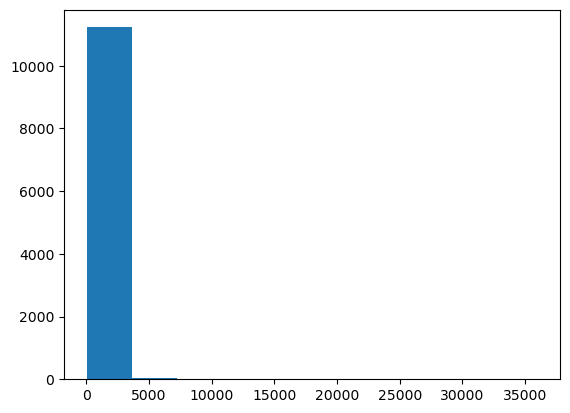

In [18]:
from matplotlib import pyplot as plt
plt.hist([len(i) for i in tokenized_texts])

In [19]:
import numpy as np

In [21]:
len(words)

181531

In [22]:
i2w = dict(enumerate(vocab))
w2i = {w: i for i, w in i2w.items()}

# max_seq_len

In [23]:
# Кодування текстів
max_seq_len = 256
x_texts = np.zeros((len(tokenized_texts), max_seq_len))

for ki, i in enumerate(tokenized_texts):
    if len(i) > max_seq_len:
        line = i[-max_seq_len:]
    else:
        line = i
    for wi, w in enumerate(line):
        x_texts[ki, wi] = w2i.get(w, len(w2i))

# Модель трансформера

В блоках далі реалізовано значно спрощену модель трансформера Bert, щоб можна було його навчати на CPU. Ваша задача - дописати його

Задачі:
- Дописати функцію get_output_block відповідно до схеми мережі, що вгорі

По варіантам, реалізувати різні FeedForward блоки
1. Dense, Dense
2. Conv1D, Dense
3. LSTM що повертає всі стани а не лище останній, Dense
4. Residual block (see wiki)

Посилання:
- https://en.wikipedia.org/wiki/Residual_neural_network
- resudal = conv(inp) + sigmoid(conv(inp))

In [35]:
def get_feed_forward(layer_one, neurons): # HERE YOUR CODE
    return layers.Dense(neurons, activation='selu')(layer_one)
    # pass

In [36]:
def get_feed_forward_test(layer_one, neurons):
    return layers.Dense(neurons, activation='selu')(layer_one)


def add_and_norm(a, b):
    return layers.BatchNormalization()(a + b)

def get_input_block(prev_block, neurons):
    # TODO: second param might be different
    mha = layers.MultiHeadAttention(2, 1)(prev_block, prev_block, prev_block)
    layer_one = add_and_norm(mha, prev_block)

    ff = get_feed_forward(layer_one, neurons)
    layer_two = add_and_norm(ff, layer_one)
    return layer_two


def get_output_block(prev_block, parallel_input, neurons): # Цей я пропоную сховати, щоб студенти самі написали
    # WRITE YOUR CODE (based on tokenized_texts variable)
    pass

# Ембедер

Ми використовуємо простий ембедер для тексту, а вам пропонуємо зробити його складнішим
Варіанти
1. return "Embedding + Conv1D + LSTM(який всі стани повертає)"
2. return "Embedding + Conv1D + Dense"
3. return "Embedding + Dense + LSTM(який всі стани повертає)"

In [37]:
def embedder(input):
    embedder = layers.Embedding(len(vocab) + 1, 16)(input) # HERE SHOULD BE YOUR CODE
    return embedder
    # pass

In [38]:
inp = layers.Input((max_seq_len,))
out = layers.Input((max_seq_len,))


input_emb = embedder(inp)
output_emb = embedder(out)

N = 2

# TODO: specify heads
neurons = [16, 16]

inp_blocks = [input_emb]
out_blocks = [output_emb]
for i in range(N):
    # TODO: add sinusoidal positional encoding
    inp_block = get_input_block(inp_blocks[-1], neurons[i])
    out_block = get_output_block(out_blocks[-1], inp_block, neurons[i])

    inp_blocks.append(inp_block)
    out_blocks.append(out_block)

manticora_head = layers.GlobalMaxPool1D()(out_blocks[-1])
manticora_head = layers.Dense(128, activation='linear')(manticora_head)
manticora_head = layers.Dense(n_classes, activation='softmax')(manticora_head)

In [39]:
from tensorflow import keras
model = keras.Model([inp, out], manticora_head)

In [40]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 256, 16)   │    290,112 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 16)   │        150 │ embedding_2[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_2[0][0… │
│                     │                   │            │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 256, 16)   │          0 │ multi_head_atten… │
│                     │                   │            │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 16)   │         64 │ add_2[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256, 16)   │        272 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 256, 16)   │    290,112 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 256, 16)   │          0 │ dense[0][0],      │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 16)   │        150 │ embedding_3[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_3[0][0… │
│                     │                   │            │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 16)   │         64 │ add_3[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 256, 16)   │          0 │ multi_head_atten… │
│                     │                   │            │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 16)   │        150 │ batch_normalizat… │
│ (MultiHeadAttentio… │                   │            │ batch_normalizat… │
│                     │                   │            │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 16)   │         64 │ add_4[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 256, 16)   │          0 │ multi_head_atten… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 16)   │        150 │ batch_normalizat… │
│ (MultiHeadAttentio… │                   │            │ batch_normalizat

 Total params: 587,608 (2.24 MB)

 Trainable params: 587,288 (2.24 MB)

 Non-trainable params: 320 (1.25 KB)

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
# TODO: shuffle train, test
model.fit([x_texts, x_texts], newsgroups_train['target'])

354/354 ━━━━━━━━━━━━━━━━━━━━ 92s 230ms/step - accuracy: 0.1913 - loss: 2.6536


In [43]:
model.evaluate([x_texts, x_texts], newsgroups_train['target'])


354/354 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.4036 - loss: 2.1482


[2.144655466079712, 0.40896233916282654]

# Задачі до навчання:
- Зробіть train-test split (Варіант 1: 80-20, варіант 2: 66-34)
- Чи добре навчена модель?

Варіанти:
1. навчіть логістичну регресію, яка б по CountVectorizer класифікувала тексти. Чи працює вона краще за Bert?
2. навчіть градієнтний бустінг, який би по TfIdf класифікував тексти. Чи працює він краще за Bert?
3. навчіть випадкове дерево, яке б по CountVectorizer класифікувало тексти. Чи працює воно краще за Bert?
4. навчіть випадковий ліс, якt б по TfIdf класифікував тексти. Чи працює він краще за Bert?
5. навчіть наївний баєсівський класифікатор, який би по CountVectorizer класифікував тексти. Чи працює він краще за Bert?

Посилання
- https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
- Всі інші моделі шукайте тут https://scikit-learn.org/1.5/supervised_learning.html

# Напишіть звіт
- Чи застосування Bert дало кращі результати?
- Чи є сенс оброблювати словник саме для задачі класифікації? 
- Для яких задач, стемінг та лематизацію ні в якому разі не можна застосовувати